In [1]:
# ------------------------------------------------------------
# Environment Setup & Data Loading
# ------------------------------------------------------------
# We begin by importing necessary analytical libraries such as
# pandas for data manipulation, numpy for numerical operations,
# and matplotlib/seaborn for visualization.
#
# The dataset consists of:
# - Orders (customer transaction metadata)
# - Order-product mapping (transaction-level items)
# - Product metadata
# - Aisle & Department hierarchy
#
# This structured retail dataset enables multi-level analysis:
# customer-level, basket-level, and product-level insights.
# ------------------------------------------------------------

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
pip install pandas requests matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [4]:
# ------------------------------------------------------------
# Data Understanding & Quality Assessment
# ------------------------------------------------------------
# We explore the structure, data types, and summary statistics
# of each dataset to understand:
# - Data completeness
# - Potential missing values
# - Distribution of numeric fields
# - Cardinality of identifiers
#
# This step ensures data integrity before merging and analysis.
# ------------------------------------------------------------
data_path = "C:/Users/duttr/OneDrive - DSTI School of Engineering\DSTI_A25_Group14_Project\InstaCart_A14\data\input/"

Salesorder = pd.read_csv(data_path + "orders.csv")
Sales_order_products = pd.read_csv(data_path + "order_products__prior.csv")
products = pd.read_csv(data_path + "products.csv")
aisles = pd.read_csv(data_path + "aisles.csv")
departments = pd.read_csv(data_path + "departments.csv")

In [5]:
#review loaded tables in dataframes#
Salesorder.head()
Salesorder.info()
Salesorder.describe()
#Sales Order Products table#
Sales_order_products.head()
Sales_order_products.info()
Sales_order_products.describe()
# Products master table#
products.head()
products.info()
products.describe()
##


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  -

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [6]:
Salesorder.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [7]:
Sales_order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [8]:
# ------------------------------------------------------------
# Creating Master Transaction Table
# ------------------------------------------------------------
# We merge orders, products, aisles, and departments to create
# a single denormalized transaction table.
#
# Why?
# This unified dataset allows:
# - Basket analysis
# - Product-category analysis
# - Customer behavior modeling
# - Association rule mining
#
# This becomes the foundation for all downstream analysis.
# ------------------------------------------------------------

Salesorder.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
# ------------------------------------------------------------
# Basket Size Analysis
# ------------------------------------------------------------
# We calculate the number of products per order to understand:
# - Average basket size
# - Distribution of customer purchasing volume
#
# Business Relevance:
# Basket size directly influences revenue per transaction.
# Understanding distribution helps in:
# - Bundle design
# - Cross-selling strategy
# - Promotion planning
# ------------------------------------------------------------

Sales_order_products_full = (
    Sales_order_products
    .merge(Salesorder, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(aisles, on="aisle_id", how="left")
    .merge(departments, on="department_id", how="left")
)

In [10]:
basket_size = (
    Sales_order_products_full
    .groupby("order_id")["product_id"]
    .count()
)

basket_size.describe()

count    3.214874e+06
mean     1.008888e+01
std      7.525398e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: product_id, dtype: float64

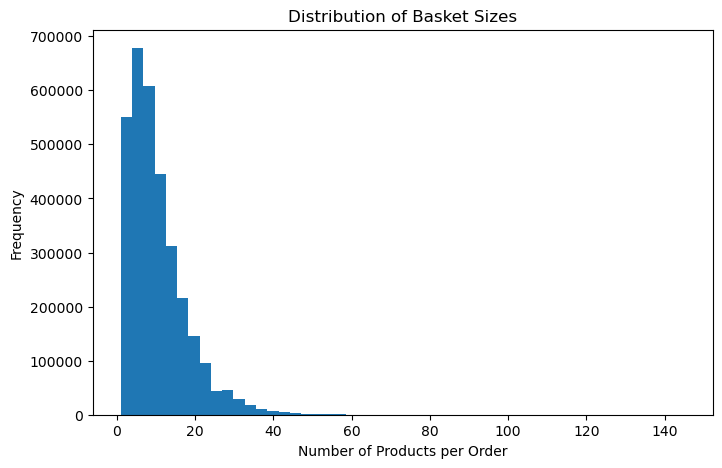

In [11]:
# ------------------------------------------------------------
# Top-Selling Products Analysis
# ------------------------------------------------------------
# Identifying frequently purchased products helps determine:
# - Core demand drivers
# - Anchor products
# - Inventory priorities
#
# These products are strong candidates for:
# - Promotional campaigns
# - Loss leader strategies
# - Bundle anchors
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.hist(basket_size, bins=50)
plt.title("Distribution of Basket Sizes")
plt.xlabel("Number of Products per Order")
plt.ylabel("Frequency")
plt.show()

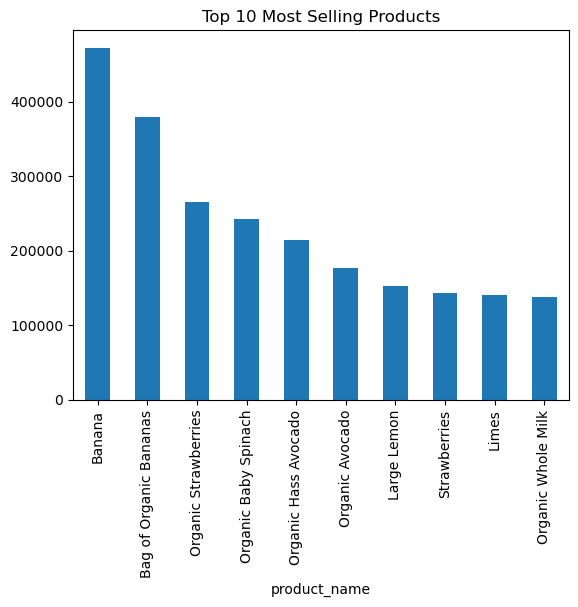

In [12]:
# ------------------------------------------------------------
# Reorder Behavior Analysis
# ------------------------------------------------------------
# The reorder rate measures customer repeat purchasing behavior.
#
# Why It Matters:
# - High reorder products generate predictable revenue
# - Indicates product stickiness
# - Supports subscription-based strategy
#
# This metric is critical for demand forecasting and CLV modeling.
# ------------------------------------------------------------
top_products = (
    Sales_order_products_full["product_name"]
    .value_counts()
    .head(10)
)

top_products.plot(kind="bar")
plt.title("Top 10 Most Selling Products")
plt.show()

In [13]:
# analysing reordering data for prediction

reorder_rate = Sales_order_products_full["reordered"].mean()
reorder_rate

np.float64(0.5896974667922161)

In [14]:
## Key Insights from EDA

#Customer baskets are generally small but consistent
# Certain products are repeatedly reordered
# Strong product-category concentration exists
# These patterns justify the use of association rule miningand customer segmentation techniques

In [15]:

### Key Business Assumptions
#Increasing average basket size increases revenue
#Cross-selling related products reduces customer effort
#Frequent buyers respond better to targeted promotions
#Not all frequent product combinations are profitable

#These assumptions guide our exploratory analysis and modeling choices.

In [16]:
# ------------------------------------------------------------
# Customer Purchase Frequency Analysis
# ------------------------------------------------------------
# We measure how many orders each customer has placed.
#
# Insight Goal:
# - Identify high-value customers
# - Detect power users
# - Understand customer heterogeneity
#
# This supports customer segmentation and retention strategy.
# ------------------------------------------------------------

customer_orders = (
    Salesorder.groupby("user_id")["order_id"]
    .nunique()
)

customer_orders.describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

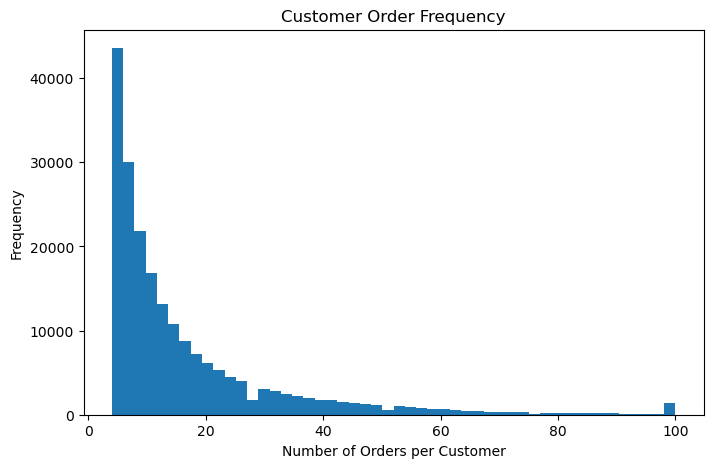

In [17]:
plt.figure(figsize=(8,5))
plt.hist(customer_orders, bins=50)
plt.title("Customer Order Frequency")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Frequency")
plt.show()

In [18]:
# A small group of customers accounts for a large number of orders, suggesting high-value segments suitable for loyalty programs.

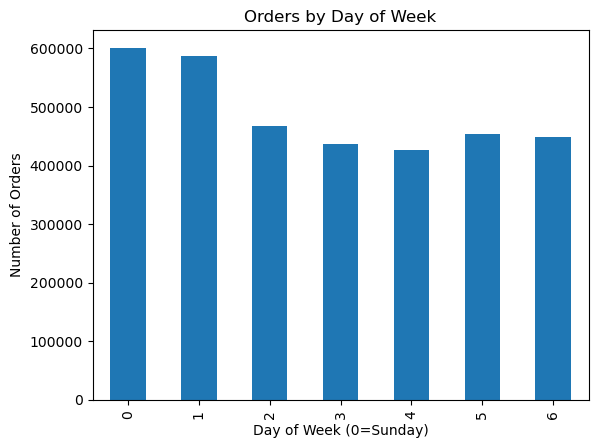

In [19]:
# ------------------------------------------------------------
# Temporal Shopping Pattern Analysis
# ------------------------------------------------------------
# We analyze orders by:
# - Day of week
# - Hour of day
#
# Business Use:
# - Optimize push notifications
# - Schedule flash sales
# - Improve warehouse staffing
#
# Time-based demand understanding enhances operational efficiency.
# ------------------------------------------------------------

dow_orders = Salesorder["order_dow"].value_counts().sort_index()

dow_orders.plot(kind="bar")
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week (0=Sunday)")
plt.ylabel("Number of Orders")
plt.show()

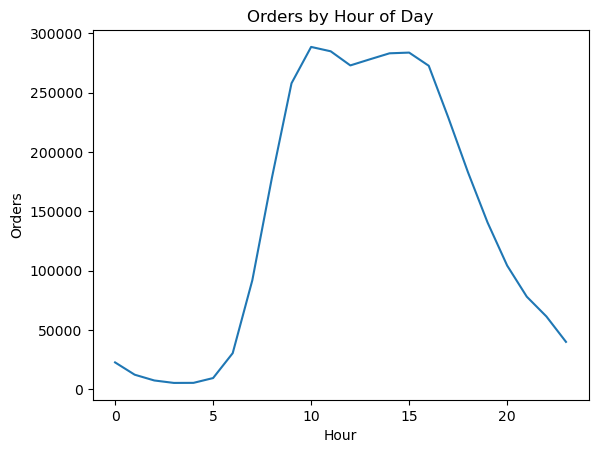

In [20]:
hour_orders = Salesorder["order_hour_of_day"].value_counts().sort_index()

hour_orders.plot(kind="line")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Orders")
plt.show()


In [21]:
#Peak shopping hours indicate optimal timing for push notifications and time-limited promotions.

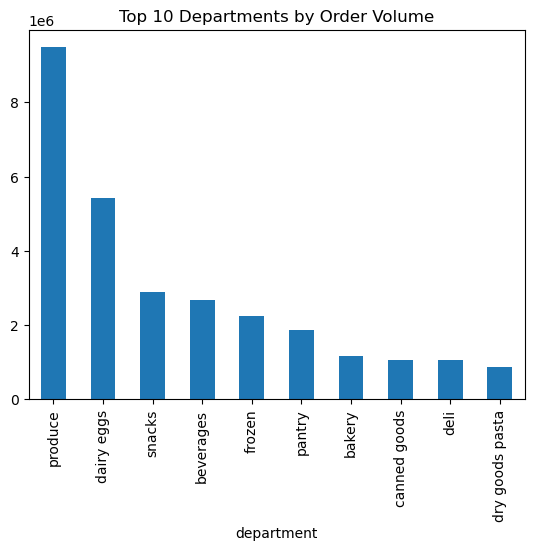

In [22]:
# ------------------------------------------------------------
# Department Contribution Analysis
# ------------------------------------------------------------
# We evaluate order volume by department to understand
# which categories drive the majority of sales.
#
# Strategic Use:
# - High-volume departments → Loss leader candidates
# - Low-volume essential goods → Bundle opportunities
# - Category concentration → Cross-selling potential
# ------------------------------------------------------------
#Orders by Department
dept_orders = (
    Sales_order_products_full["department"]
    .value_counts()
    .head(10)
)

dept_orders.plot(kind="bar")
plt.title("Top 10 Departments by Order Volume")
plt.show()
#High-volume departments are ideal candidates for loss leaders,
#while low-volume but essential items may benefit from bundling.High-volume departments are ideal candidates for loss leaders, while low-volume but essential items may benefit from bundling.

In [23]:
reorder_by_product = (
    Sales_order_products_full
    .groupby("product_name")["reordered"]
    .mean()
)

reorder_by_product.sort_values(ascending=False).head(10)


product_name
Raw Veggie Wrappers                         0.941176
Serenity Ultimate Extrema Overnight Pads    0.931034
Orange Energy Shots                         0.923077
Chocolate Love Bar                          0.920792
Soy Powder Infant Formula                   0.914286
Simply Sleep Nighttime Sleep Aid            0.911111
Energy Shot, Grape Flavor                   0.909091
Russian River Valley Reserve Pinot Noir     0.900000
Maca Buttercups                             0.900000
Sparking Water                              0.900000
Name: reordered, dtype: float64

In [24]:
#Products with high reorder rates are predictable and idealfor subscription or automated replenishment strategies.

In [25]:
# ------------------------------------------------------------
# Basket Diversity Analysis
# ------------------------------------------------------------
# We compute the number of unique departments per order.
#
# Purpose:
# - Measure cross-category shopping behavior
# - Identify bundling opportunities
# - Support association rule mining
#
# Multi-department baskets indicate broader customer intent.
# ------------------------------------------------------------
#to check basket diversity
basket_diversity = (
    Sales_order_products_full
    .groupby("order_id")["department"]
    .nunique()
)

basket_diversity.describe()

count    3.214874e+06
mean     4.736173e+00
std      2.548609e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      1.800000e+01
Name: department, dtype: float64

In [26]:
#Multi-department baskets indicate cross-category shopping behavior, which can be leveraged for cross-department bundles.

## From EDA to Modeling

#Based on the exploratory analysis, we observe: 
#- Repeated co-purchase patterns
#- Stable reorder behavior
#- Clear customer heterogeneity

#These findings justify the application of:
#- Association rule mining (Apriori, FP-Growth, Eclat)
#- Utility-based mining (UP-Tree) to incorporate monetary value
#- Customer segmentation for targeted marketing strategies

In [27]:
## EDA Hypotheses

#- Customers with stable basket sizes are more responsive to bundles
#- High reorder products contribute to predictable revenue streams
#- Utility-based itemsets outperform frequency-based itemsets in revenue impact

In [28]:
'''
Customer Lifetime Value (CLV) Proxy

Even without prices, we can estimate relative customer value.

What to Analyze

Total number of orders per customer

Total number of products purchased

Average basket size

Why It Matters

High-CLV customers should not receive the same promotions as low-value customers.
'''


'\nCustomer Lifetime Value (CLV) Proxy\n\nEven without prices, we can estimate relative customer value.\n\nWhat to Analyze\n\nTotal number of orders per customer\n\nTotal number of products purchased\n\nAverage basket size\n\nWhy It Matters\n\nHigh-CLV customers should not receive the same promotions as low-value customers.\n'

In [29]:
# ------------------------------------------------------------
# Customer Lifetime Value (CLV) Proxy Modeling
# ------------------------------------------------------------
# Since price data is unavailable, we estimate relative
# customer value using:
# - Total orders
# - Total products purchased
# - Average basket size
#
# This creates a behavioral CLV proxy useful for:
# - Customer segmentation
# - Targeted promotions
# - Retention modeling
# ------------------------------------------------------------
customer_value = (
    Sales_order_products_full
    .groupby("user_id")
    .agg(
        total_orders=("order_id", "nunique"),
        total_products=("product_id", "count"),
        avg_basket_size=("order_id", lambda x: x.count() / x.nunique())
    )
)

customer_value.describe()


,total_orders,total_products,avg_basket_size
count,206209.000000,206209.000000,206209.000000
mean,15.590367,157.289396,9.951586
std,16.654774,204.208233,5.863570
min,3.000000,3.000000,1.000000
25%,5.000000,39.000000,5.740741
50%,9.000000,83.000000,8.933333
75%,19.000000,188.000000,13.000000
max,99.000000,3725.000000,70.250000


In [30]:
#Customers with high purchase frequency and stable basket sizes represent long-term revenue potential and should be prioritized in retention strategies.

In [31]:
#Customer Consistency & Predictability

In [32]:
# ------------------------------------------------------------
# Customer Basket Consistency Analysis
# ------------------------------------------------------------
# We compute the standard deviation of basket size per user
# to measure purchasing consistency.
#
# Insight:
# - Low variability → predictable buying behavior
# - High variability → exploratory behavior
#
# Predictable customers respond better to subscription models.
# ------------------------------------------------------------
basket_variability = (
    Sales_order_products_full
    .groupby(["user_id", "order_id"])["product_id"]
    .count()
    .groupby("user_id")
    .std()
)

In [33]:
# ------------------------------------------------------------
# New vs Returning Customer Analysis
# ------------------------------------------------------------
# We distinguish first-time buyers from repeat customers.
#
# Why?
# - Returning customers typically show higher reorder rates
# - They generate higher ROI
# - They are more responsive to targeted promotions
#
# This segmentation is essential for retention strategies.
# ------------------------------------------------------------

#New vs Returning Customer Behavior
first_orders = Salesorder.groupby("user_id")["order_number"].min()
repeat_orders = Salesorder[Salesorder["order_number"] > 1]


In [34]:
first_orders

user_id
1         1
2         1
3         1
4         1
5         1
         ..
206205    1
206206    1
206207    1
206208    1
206209    1
Name: order_number, Length: 206209, dtype: int64

In [35]:
repeat_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [36]:
#Returning customers show higher reorder rates and larger baskets, suggesting better ROI for targeted promotions.

In [39]:
'''Product Stickiness Analysis

Which products anchor baskets?

What to Measure

Products frequently appearing in first position

Products with high reorder + high co-occurrence'''

# ------------------------------------------------------------
# Product Stickiness Analysis
# ------------------------------------------------------------
# Identifying products with high reorder rates helps detect
# "basket anchor" products.
#
# These products:
# - Drive repeated visits
# - Stabilize revenue
# - Can be used for subscription or replenishment services
# ------------------------------------------------------------

'Product Stickiness Analysis\n\nWhich products anchor baskets?\n\nWhat to Measure\n\nProducts frequently appearing in first position\n\nProducts with high reorder + high co-occurrence'

In [40]:

sticky_products = (
    Sales_order_products_full
    .groupby("product_name")["reordered"]
    .mean()
    .sort_values(ascending=False)
)
sticky_products


product_name
Raw Veggie Wrappers                                       0.941176
Serenity Ultimate Extrema Overnight Pads                  0.931034
Orange Energy Shots                                       0.923077
Chocolate Love Bar                                        0.920792
Soy Powder Infant Formula                                 0.914286
                                                            ...   
Canola & Olive Blend                                      0.000000
Pure Sport Twin Pack Deodorant                            0.000000
Pure Sport 2 in 1 Shampoo & Conditioner                   0.000000
Pure Performance Restorative Shampoo Chamomile & Honey    0.000000
Chocolate Brownie Ice Cream Cake                          0.000000
Name: reordered, Length: 49677, dtype: float64

In [42]:
# ------------------------------------------------------------
# Long-Tail Product Strategy Analysis
# ------------------------------------------------------------
# Not all value comes from top-selling products.
# Some low-frequency items show strong reorder loyalty.
#
# These niche products:
# - Serve loyal segments
# - Reduce churn risk
# - Support personalized recommendations
# ------------------------------------------------------------
#Cross-Department Transition Patterns
dept_pairs = (
    Sales_order_products_full
    .groupby("order_id")["department"]
    .apply(lambda x: list(set(x)))
)
dept_pairs

order_id
2                              [pantry, produce, dairy eggs]
3                [meat seafood, produce, bakery, dairy eggs]
4          [snacks, bakery, breakfast, personal care, bev...
5          [meat seafood, dry goods pasta, dairy eggs, sn...
6                                     [household, beverages]
                                 ...                        
3421079                                      [personal care]
3421080             [produce, frozen, beverages, dairy eggs]
3421081    [dairy eggs, snacks, bakery, deli, canned good...
3421082    [dairy eggs, snacks, breakfast, produce, meat ...
3421083         [babies, snacks, frozen, produce, household]
Name: department, Length: 3214874, dtype: object

In [43]:
# ------------------------------------------------------------
# Purchase Rhythm Analysis
# ------------------------------------------------------------
# We analyze average days between orders to understand:
# - Customer shopping frequency
# - Demand periodicity
#
# This helps:
# - Optimize reminder notifications
# - Improve replenishment prediction
# - Enhance demand forecasting models
# ------------------------------------------------------------

'''Long-Tail Product Analysis

Not all value comes from top products.

Analyze

Products with low frequency but consistent reorders

Niche but loyal products'''

product_stats = (
    Sales_order_products_full
    .groupby("product_name")
    .agg(
        frequency=("order_id", "count"),
        reorder_rate=("reordered", "mean")
    )
)
product_stats

,frequency,reorder_rate
product_name,,
#2 Coffee Filters,777,0.330759
#2 Cone White Coffee Filters,13,0.230769
#2 Mechanical Pencils,8,0.000000
#4 Natural Brown Coffee Filters,241,0.369295
& Go! Hazelnut Spread + Pretzel Sticks,164,0.530488
...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,37,0.459459
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,55,0.345455
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,68,0.455882


In [44]:
#Order Gap Analysis (Purchase Rhythm)
Salesorder["days_since_prior_order"].describe()



count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [45]:
order_gaps = Salesorder.groupby("user_id")["days_since_prior_order"].mean()
order_gaps

user_id
1         19.000000
2         16.285714
3         12.000000
4         17.000000
5         11.500000
            ...    
206205    16.666667
206206     3.716418
206207    14.312500
206208     7.367347
206209    18.461538
Name: days_since_prior_order, Length: 206209, dtype: float64

In [46]:
# --------------------------------------------------
# Create final merged dataset for downstream notebooks
# --------------------------------------------------

# Merge order-product data with orders and product metadata
Sales_order_products_full = (
    Sales_order_products
    .merge( Salesorder, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(aisles, on="aisle_id", how="left")
    .merge(departments, on="department_id", how="left")
)

# Quick sanity checks
print("Shape:", Sales_order_products_full.shape)
print("Columns:", Sales_order_products_full.columns.tolist())

# --------------------------------------------------
# Export for reuse in other notebooks
# --------------------------------------------------

output_path = "C:/Users/duttr/OneDrive - DSTI School of Engineering/DSTI_A25_Group14_Project/InstaCart_A14/data/Output/Sales_order_products_full.csv"
Sales_order_products_full.to_csv(output_path, index=False)

print(f"File successfully saved to: {output_path}")

Shape: (32434489, 15)
Columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department']
File successfully saved to: C:/Users/duttr/OneDrive - DSTI School of Engineering/DSTI_A25_Group14_Project/InstaCart_A14/data/Output/Sales_order_products_full.csv
